Question no.2 :- Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

Answer no.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data.duplicated().sum()

24

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [ ]:
# Seperate numrerical and categorical data
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<Axes: >

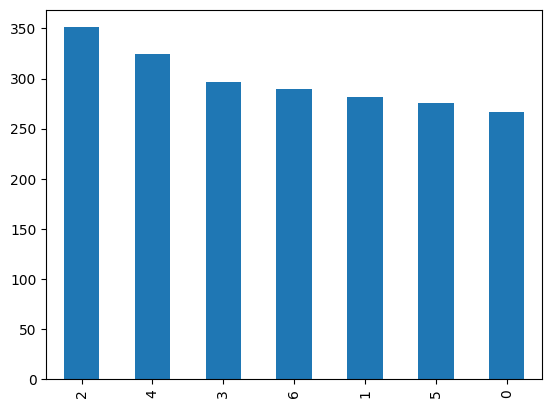

In [ ]:
data['NObeyesdad'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in categorical_features:
    data[i] = label.fit_transform(data[i])

<Axes: >

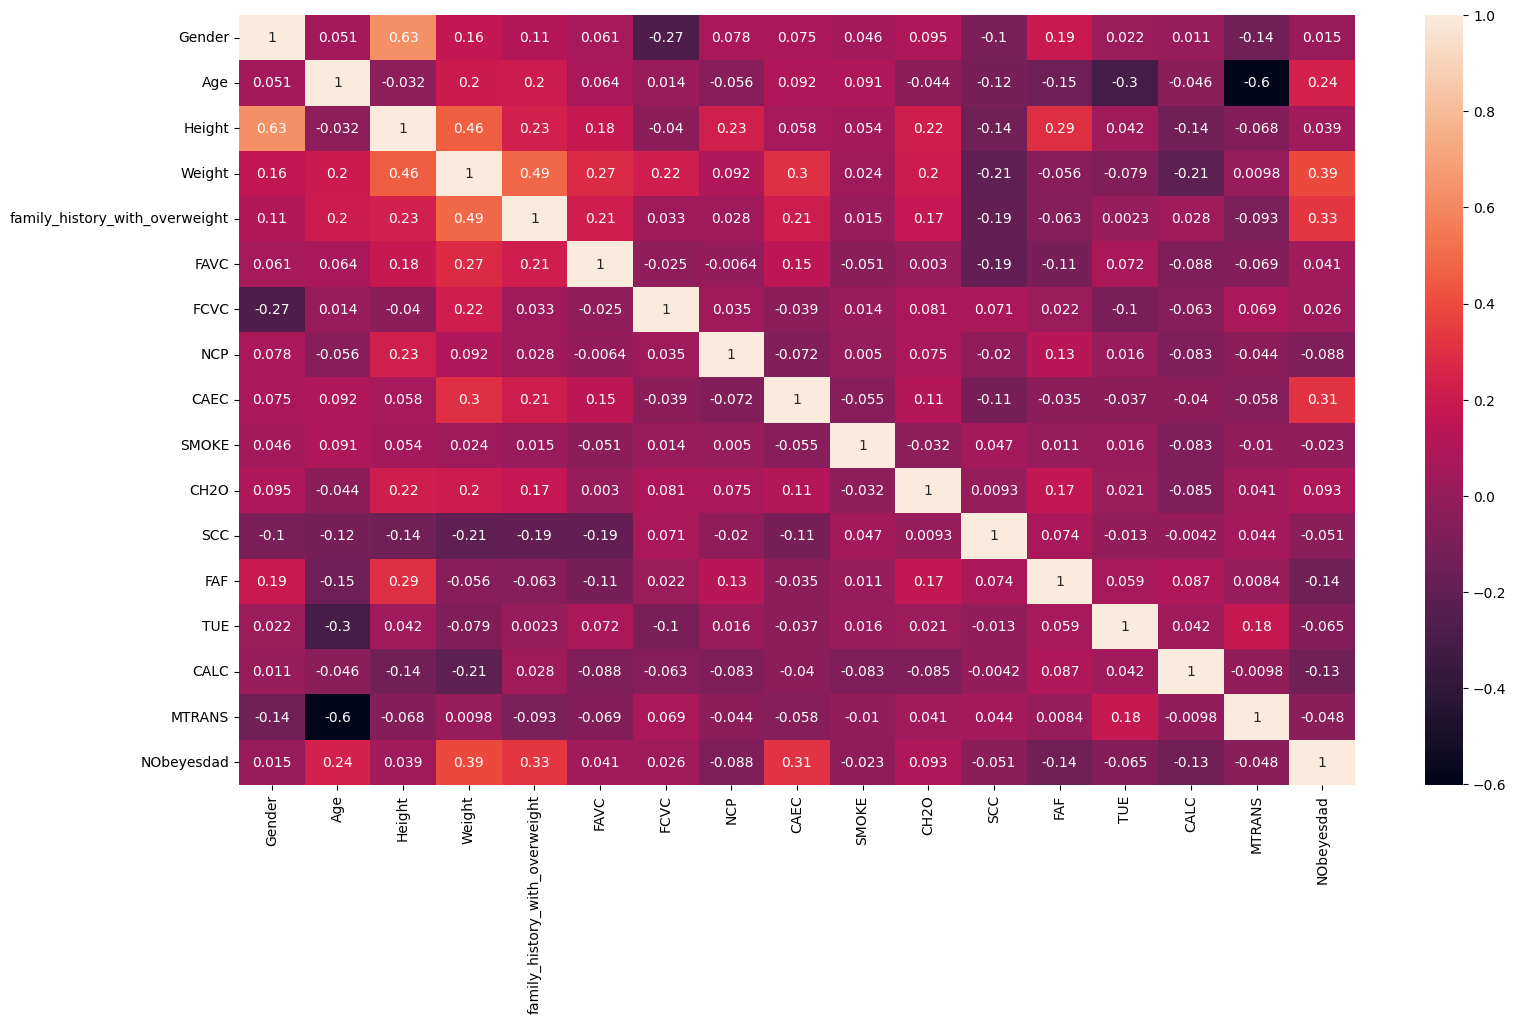

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
x = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']

In [ ]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Creating Piplines
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Creating preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cat_pipline",cat_pipline,categorical_features)
])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logestic = LogisticRegression(class_weight="balanced")
logestic.fit(X_train,y_train)

In [ ]:
logestic.score(X_train,y_train)

0.8939484721390054

In [38]:
y_pred = logestic.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9043062200956937

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        44
           1       0.90      0.73      0.81        52
           2       0.94      0.87      0.90        67
           3       0.97      1.00      0.98        63
           4       1.00      1.00      1.00        74
           5       0.84      0.84      0.84        58
           6       0.79      0.87      0.83        60

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.91      0.90      0.90       418



In [48]:
svm = SVC(C=10)
svm.fit(X_train,y_train)

SVC(C=10)

In [49]:
svm.score(X_train,y_train)

0.9988016776512882

In [50]:
y_pred = svm.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.9425837320574163

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.84      0.81      0.82        52
           2       0.97      0.96      0.96        67
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        74
           5       0.91      0.88      0.89        58
           6       0.92      0.98      0.95        60

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [54]:
Decision_tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced",min_samples_split=5)
Decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [56]:
Decision_tree.score(X_train,y_train)

0.9832234871180348

In [57]:
y_pred = Decision_tree.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.9330143540669856

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.88      0.73      0.80        52
           2       1.00      0.93      0.96        67
           3       1.00      1.00      1.00        63
           4       0.97      1.00      0.99        74
           5       0.83      0.91      0.87        58
           6       0.94      0.97      0.95        60

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



In [61]:
Random_forest = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight="balanced",min_samples_split=5)
Random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200)

In [62]:
Random_forest.score(X_train,y_train)

0.9976033553025764

In [63]:
y_pred = Random_forest.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.9593301435406698

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.90      0.88      0.89        52
           2       1.00      0.96      0.98        67
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        74
           5       0.95      0.91      0.93        58
           6       0.91      1.00      0.95        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418

